# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$

Parameter estimation is performed by subtracting the mean and using OLS on the zero mean series. Let $\hat{\mu}$ denote the estimated mean,

$
\begin{align}
\hat{\mu} = \frac{1}{n}\sum_{i=0}^n X_i
\end{align}
$

Then use $\text{AR}(1)$ parameter estimation on,

$
\begin{align}
X_t - \hat{\mu}
\end{align}
$

Then the offset is given by,

$
\begin{align}
\mu = \hat{\mu} \hat{\varphi}
\end{align}
$

where $\hat{\varphi}$ is the estimate.

## Imports

In [98]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib.plot_config import (FuncPlotType, DataPlotType, CumPlotType)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [22]:
σ = 1.0
nsample = 1000

def plot_labels_φ(φ):
    return [f"φ={val}" for val in φ]

def plot_labels_μ(μ):
    return [f"μ={val}" for val in μ]

def ar1_series_φ(φ_vals, μ):
    series = []
    for φ in φ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

def ar1_series_μ(φ, μ_vals):
    series = []
    for μ in μ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

## Simulation $\varphi$ Scan

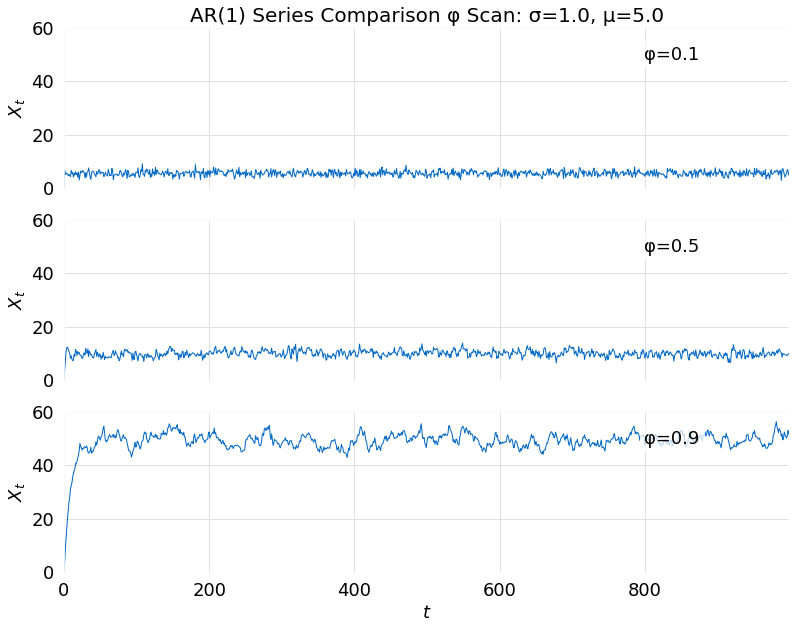

In [39]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, μ={μ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
plots.stack(series, ylim=[0.0, 60.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

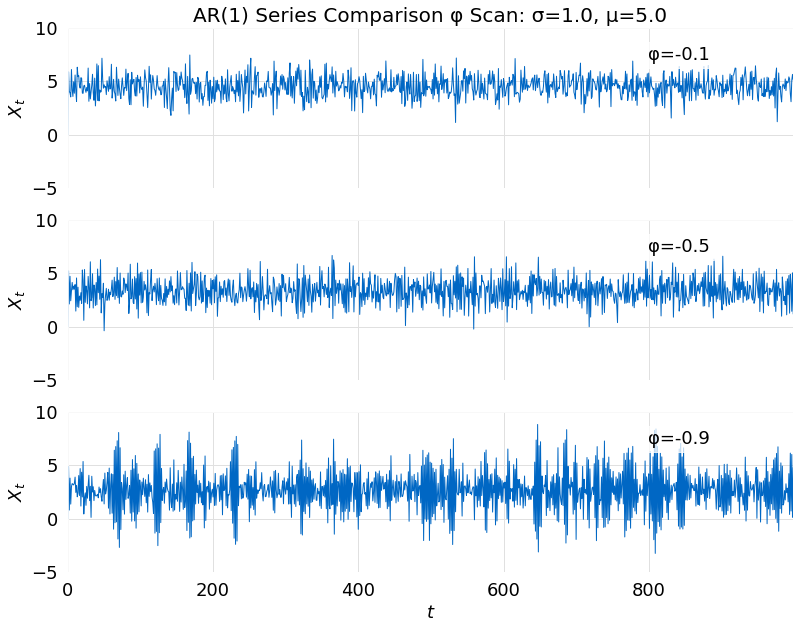

In [40]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, μ={μ}"
φ = numpy.array([-0.1, -0.5, -0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
plots.stack(series, ylim=[-5.0, 10.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\mu$ Scan

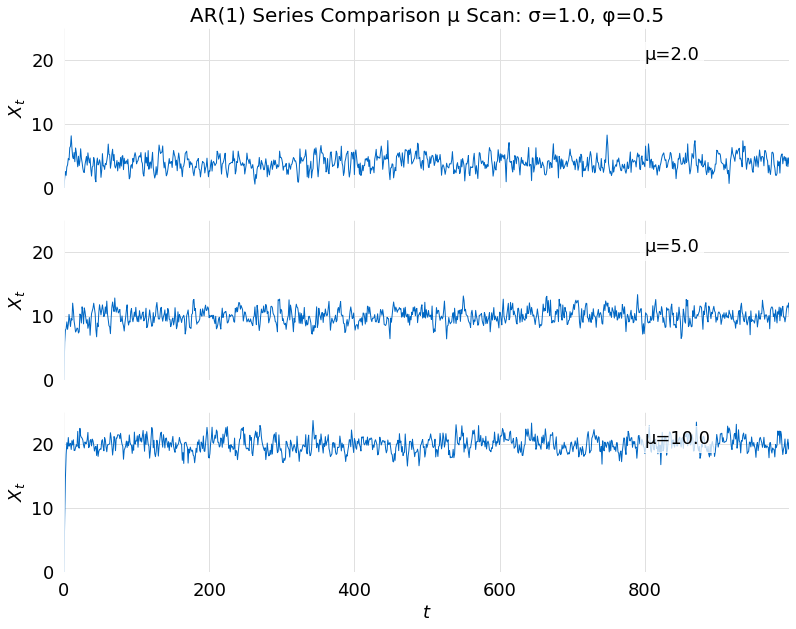

In [41]:
φ = 0.5
title = f"AR(1) Series Comparison μ Scan: σ={σ}, φ={φ}"
μ = numpy.array([2.0, 5.0, 10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
plots.stack(series, ylim=[0.0, 25.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

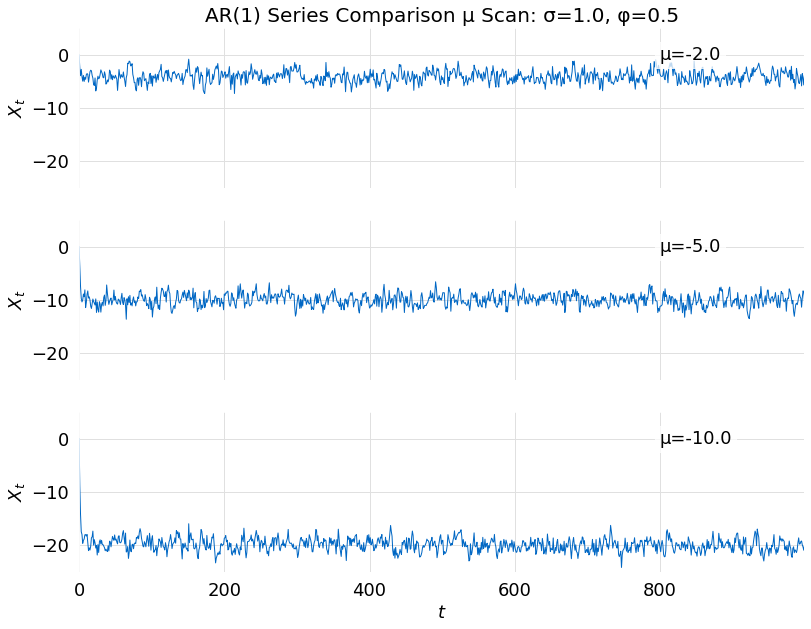

In [42]:
φ = 0.5
title = f"AR(1) Series Comparison μ Scan: σ={σ}, φ={φ}"
μ = numpy.array([-2.0, -5.0, -10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
plots.stack(series, ylim=[-25.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

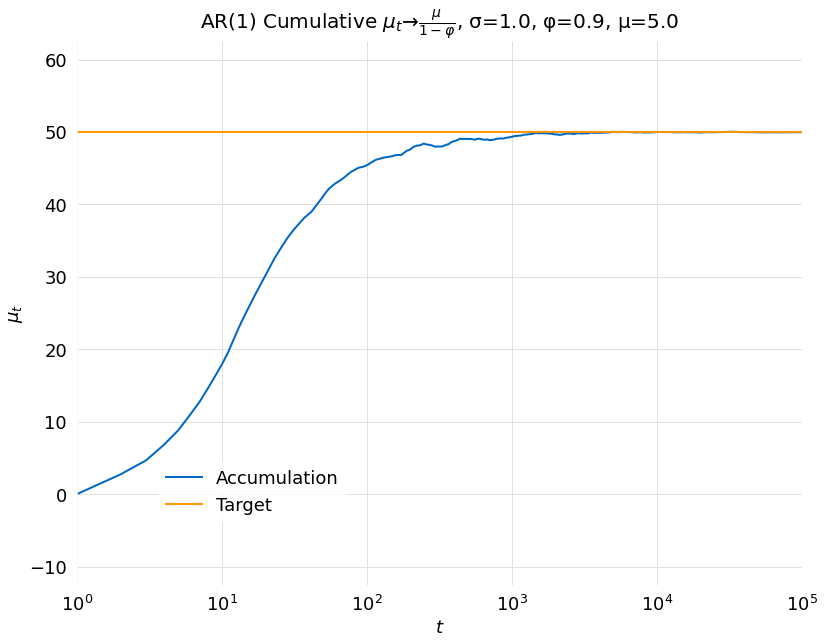

In [70]:
φ = 0.9
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

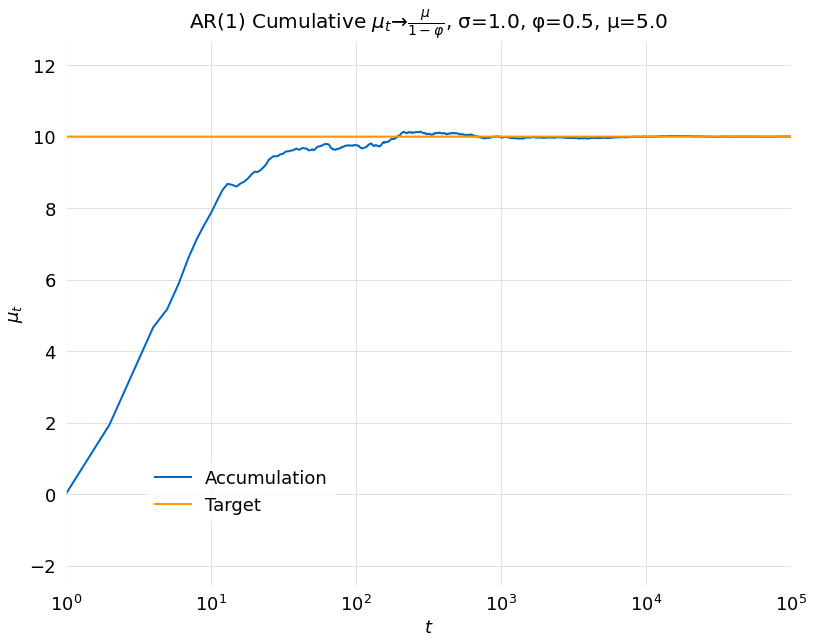

In [71]:
φ = 0.5
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

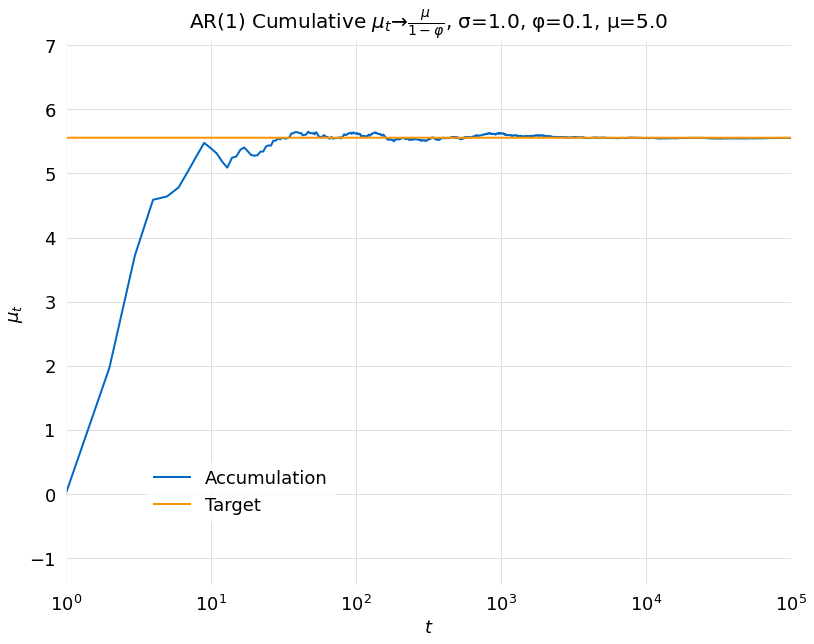

In [72]:
φ = 0.1
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

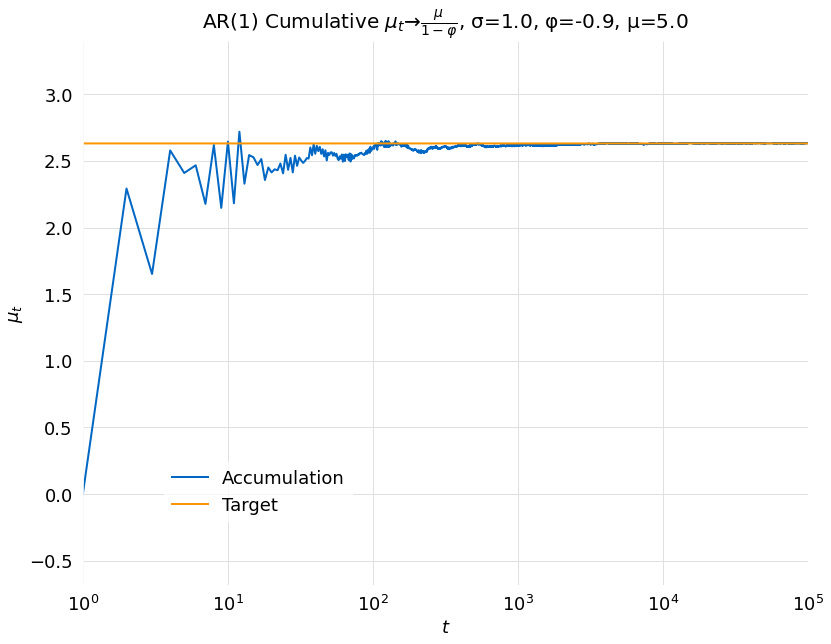

In [73]:
φ = -0.9
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

## Standard Deviation

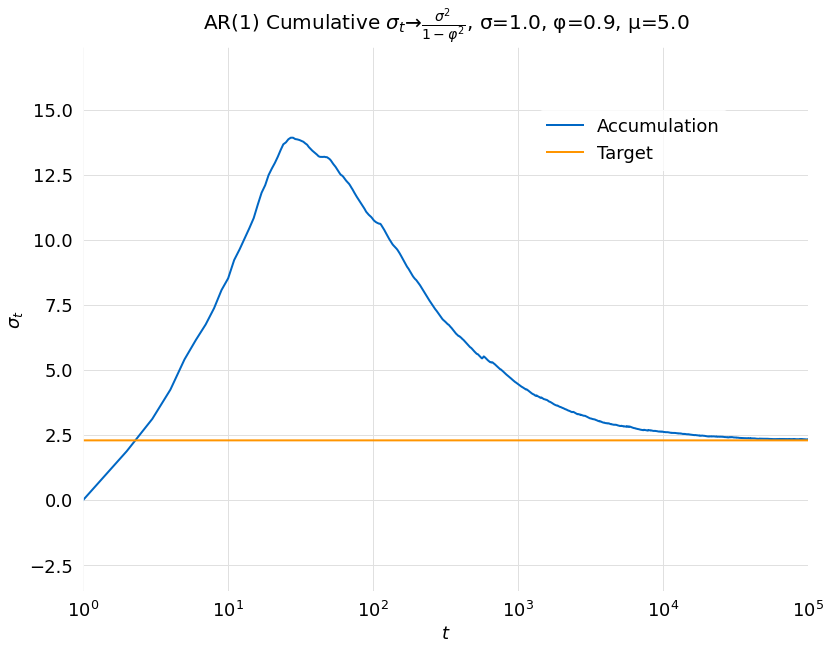

In [77]:
φ = 0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

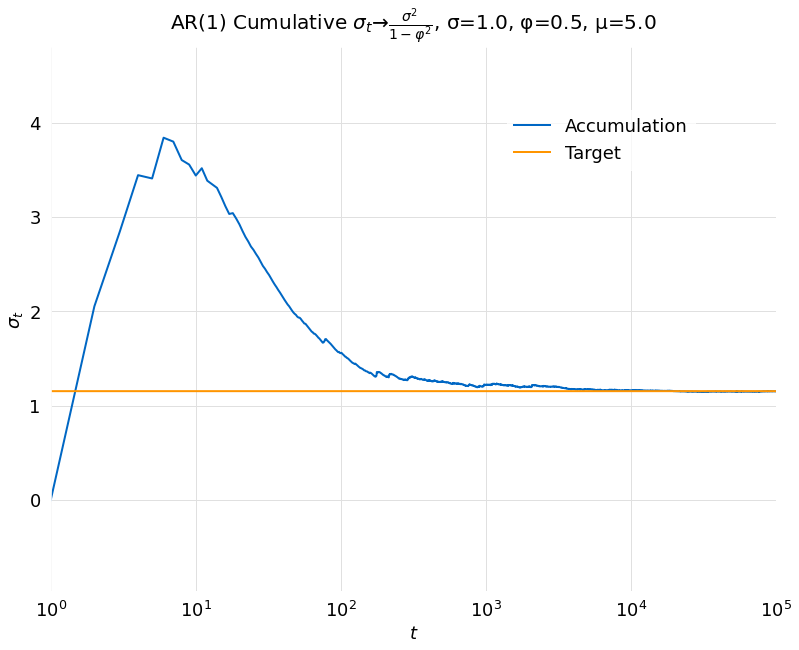

In [76]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

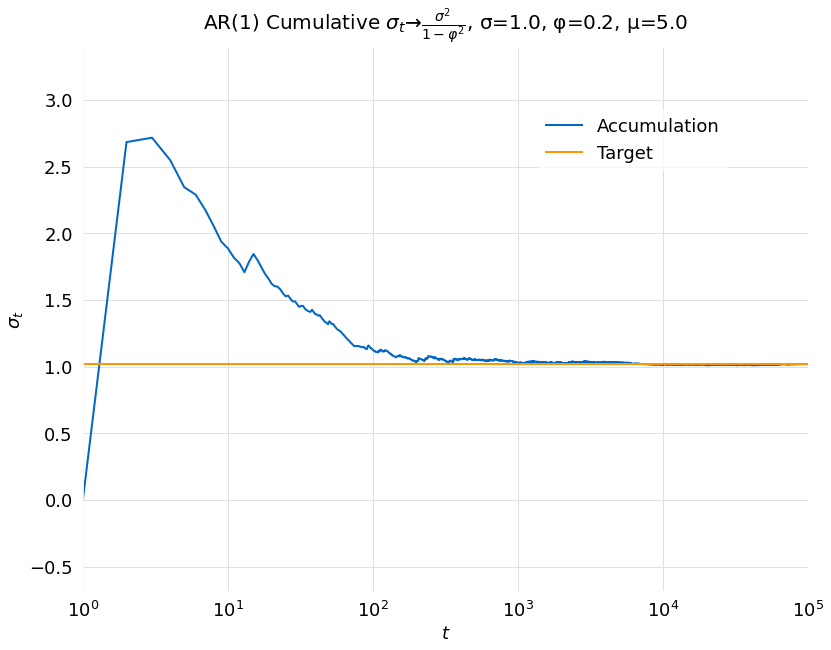

In [75]:
φ = 0.2
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

## Parameter Estimation

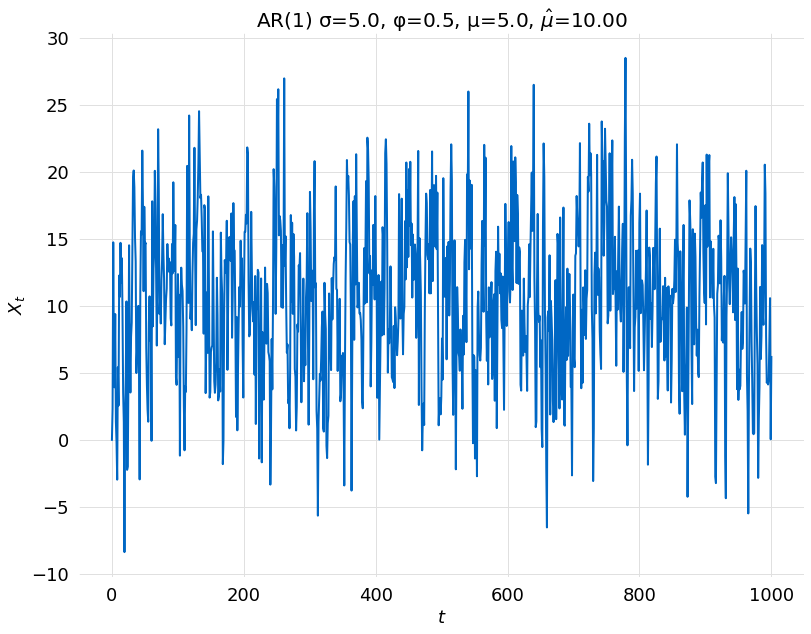

In [138]:
φ = 0.5
μ = 5.0
σ = 5.0
nsample = 1000
samples = arima.arp_offset([φ], μ, nsample, σ)
title = f"AR(1) σ={σ}, φ={φ}, μ={μ}," + r" $\hat{\mu}$=" + f"{format(μ/(1.0-φ), '4.2f')}"
plots.curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [126]:
results = arima.ar_offset_fit(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3022.761
Date:                Wed, 13 Apr 2022   AIC                           6051.523
Time:                        19:46:08   BIC                           6066.246
Sample:                             0   HQIC                          6057.119
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0620      0.347     28.981      0.000       9.382      10.742
ar.L1          0.5487      0.027     20.432      0.000       0.496       0.601
sigma2        24.7121      1.118     22.103      0.000      22.521      26.903
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.96   Prob(JB):                         0.93
Heteroskedasticity (H):               0.86   Skew:                            -0.02
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

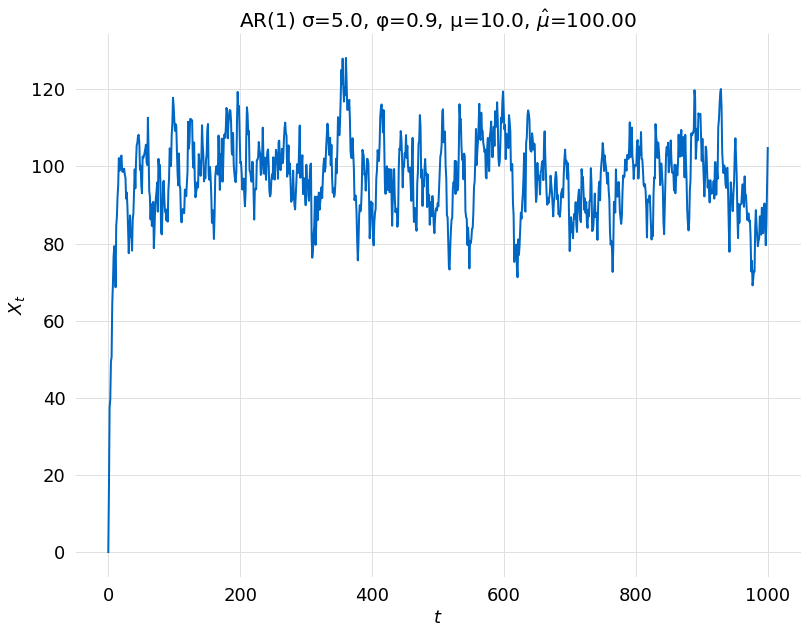

In [147]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, μ={μ}," + r" $\hat{\mu}$=" + f"{format(μ/(1.0-φ), '4.2f')}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [148]:
results = arima.ar_offset_fit(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3065.076
Date:                Wed, 13 Apr 2022   AIC                           6136.151
Time:                        20:04:38   BIC                           6150.874
Sample:                             0   HQIC                          6141.747
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.8817      1.987     48.242      0.000      91.986      99.777
ar.L1          0.9185      0.005    171.377      0.000       0.908       0.929
sigma2        26.8537      1.114     24.107      0.000      24.670      29.037
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               330.28
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.38
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

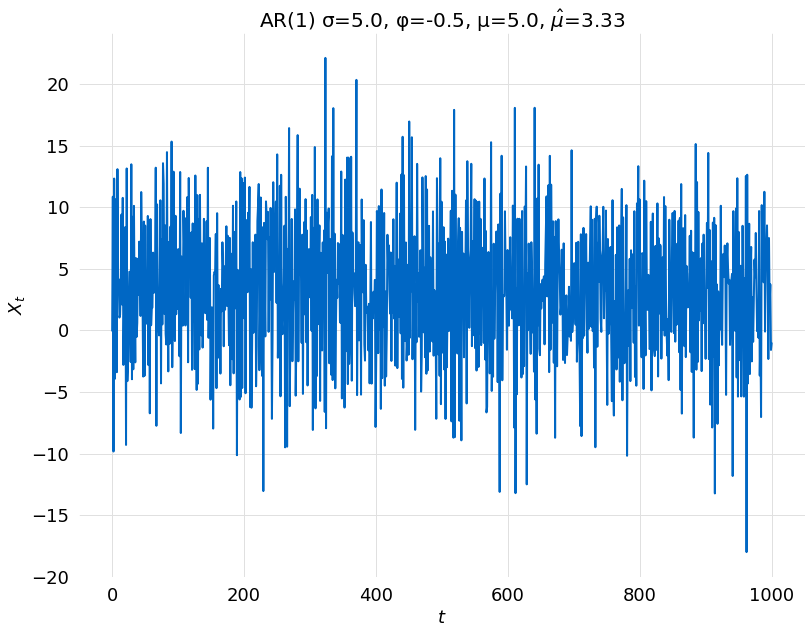

In [153]:
φ = -0.5
μ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, μ={μ}," + r" $\hat{\mu}$=" + f"{format(μ/(1.0-φ), '4.2f')}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [154]:
results = arima.ar_offset_fit(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3045.847
Date:                Wed, 13 Apr 2022   AIC                           6097.695
Time:                        20:05:04   BIC                           6112.418
Sample:                             0   HQIC                          6103.290
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2182      0.109     29.526      0.000       3.005       3.432
ar.L1         -0.4769      0.029    -16.294      0.000      -0.534      -0.420
sigma2        25.8825      1.146     22.579      0.000      23.636      28.129
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.84   Prob(JB):                         0.82
Heteroskedasticity (H):               0.88   Skew:                            -0.04
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""